# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [144]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#test calls to confirm I am getting random cities from all lat_lngs
print(city, lat_lng)

lompoc (21.639219106348378, -128.95745911899598)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [145]:
#request variables

url = "http://api.openweathermap.org/data/2.5/weather?"

#empty lists to store information that I need for dataframe and plots
city = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

n = 1

In [146]:
#test call to check format of json return

testcall = requests.get("http://api.openweathermap.org/data/2.5/weather?q=toronto&units=metric&appid=a1349063ee99a929865315ed0494d173").json()
print(testcall)

{'cod': 429, 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}


In [86]:
#complete weather check and print log of each city as it is being processed

print("Beginning Data Retrieval")
print("------------------------")

for i in cities:
    try:
        #completing the call
        response = requests.get(f"{url}q={i}&units=metric&appid={api_key}").json()
        
        #append parts of responses needed to fill out dataframe
        city.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        city_name = response["name"]
        country_name = response["sys"]["country"]
        
        n=+1
        print(f"Processing City: {i}")
    except:
        print("City not found. Skipping...")
    continue
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping..

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#count data to make sure I am the same amount of values for each variable list

print(f"City: {len(city)}")
print(f"Country: {len(country)}")
print(f"Latitude: {len(latitude)}")
print(f"Longitude: {len(longitude)}")
print(f"Cloudiness: {len(cloudiness)}")
print(f"Humidity: {len(humidity)}")
print(f"Maximum Temperature: {len(max_temp)}")
print(f"Wind Speed: {len(wind_speed)}")
print(f"Date: {len(date)}")

City: 563
Country: 563
Latitude: 563
Longitude: 563
Cloudiness: 563
Humidity: 563
Maximum Temperature: 563
Wind Speed: 563
Date: 563


In [7]:
#create a dataframe
city_data = pd.DataFrame({"City": city,
                          "Country": country,
                          "Latitude": latitude,
                          "Longitude": longitude,
                          "Cloudiness": cloudiness,
                          "Humidity": humidity,
                          "Max_Temp": max_temp,
                          "Wind_Speed": wind_speed,
                          "Date": date})

#display the dataframe
city_data.head()

,City,Country,Latitude,Longitude,Cloudiness,Humidity,Max_Temp,Wind_Speed,Date
0,Bluff,NZ,-46.60,168.33,36,75,295.37,1.79,1581893644
1,Haines Junction,CA,60.75,-137.51,96,92,251.17,1.61,1581893644
2,Anadyr,RU,64.75,177.48,100,59,256.15,13.00,1581893644
3,Bernalillo,US,35.05,-106.67,1,19,292.15,8.70,1581893644
4,Talcahuano,CL,-36.72,-73.12,0,64,293.15,6.20,1581893644


In [112]:
#convert timestamp to datetime format

dates = city_data["Date"].unique()
# print(dates)
access_date = []

readabletrial = dt.datetime.fromtimestamp(1581893644).isoformat()
print(readable)
      
for i in dates:
    try:
        readable = dt.datetime.fromtimestamp(i).isoformat()
        access_date.append(readable)
        print(f"Processing {i}: {readable}")
        n=+1
    except:
        print(error)
        continue

2020-02-16T17:53:05
Processing 1581893644: 2020-02-16T17:54:04
Processing 1581893486: 2020-02-16T17:51:26
Processing 1581893568: 2020-02-16T17:52:48
Processing 1581893645: 2020-02-16T17:54:05
Processing 1581893429: 2020-02-16T17:50:29
Processing 1581893232: 2020-02-16T17:47:12
Processing 1581893423: 2020-02-16T17:50:23
Processing 1581893417: 2020-02-16T17:50:17
Processing 1581893201: 2020-02-16T17:46:41
Processing 1581893547: 2020-02-16T17:52:27
Processing 1581893410: 2020-02-16T17:50:10
Processing 1581893202: 2020-02-16T17:46:42
Processing 1581893646: 2020-02-16T17:54:06
Processing 1581893263: 2020-02-16T17:47:43
Processing 1581893438: 2020-02-16T17:50:38
Processing 1581893121: 2020-02-16T17:45:21
Processing 1581893503: 2020-02-16T17:51:43
Processing 1581893412: 2020-02-16T17:50:12
Processing 1581893416: 2020-02-16T17:50:16
Processing 1581893443: 2020-02-16T17:50:43
Processing 1581893256: 2020-02-16T17:47:36
Processing 1581893413: 2020-02-16T17:50:13
Processing 1581893426: 2020-02-16T

In [116]:
print(access_date)

['2020-02-16T17:54:04', '2020-02-16T17:51:26', '2020-02-16T17:52:48', '2020-02-16T17:54:05', '2020-02-16T17:50:29', '2020-02-16T17:47:12', '2020-02-16T17:50:23', '2020-02-16T17:50:17', '2020-02-16T17:46:41', '2020-02-16T17:52:27', '2020-02-16T17:50:10', '2020-02-16T17:46:42', '2020-02-16T17:54:06', '2020-02-16T17:47:43', '2020-02-16T17:50:38', '2020-02-16T17:45:21', '2020-02-16T17:51:43', '2020-02-16T17:50:12', '2020-02-16T17:50:16', '2020-02-16T17:50:43', '2020-02-16T17:47:36', '2020-02-16T17:50:13', '2020-02-16T17:50:26', '2020-02-16T17:54:07', '2020-02-16T17:50:53', '2020-02-16T17:50:30', '2020-02-16T17:49:12', '2020-02-16T17:50:32', '2020-02-16T17:54:08', '2020-02-16T17:50:06', '2020-02-16T17:50:09', '2020-02-16T17:50:15', '2020-02-16T17:50:24', '2020-02-16T17:51:25', '2020-02-16T17:47:05', '2020-02-16T17:47:38', '2020-02-16T17:54:09', '2020-02-16T17:49:03', '2020-02-16T17:50:25', '2020-02-16T17:45:18', '2020-02-16T17:51:07', '2020-02-16T17:50:37', '2020-02-16T17:54:10', '2020-02-1

In [9]:
#export the city data into a .csv
city_data.to_csv('city_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

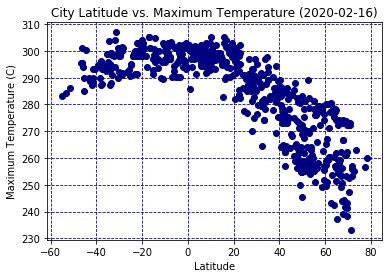

In [133]:
#form scatter plot
plt.scatter(city_data["Latitude"], city_data["Max_Temp"], facecolors="navy")

#formatting
plt.title("City Latitude vs. Maximum Temperature (2020-02-16)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.grid(linestyle="--", color="navy")

#save plot as image
#plt.savefig("Latitude_vs_MaxTemp.png")

#### Latitude vs. Humidity Plot

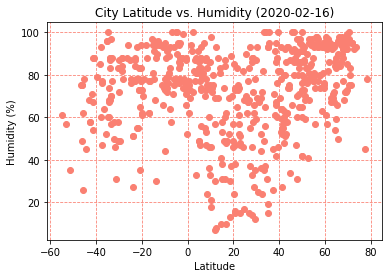

In [136]:
#line to form scatter plot
plt.scatter(city_data["Latitude"], city_data["Humidity"], facecolors="salmon")

#formatting
plt.title("City Latitude vs. Humidity (2020-02-16)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="--", color="salmon")

#save plot as image
#plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

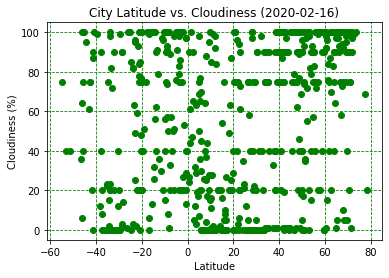

In [142]:
#line to form scatter plot
plt.scatter(city_data["Latitude"], city_data["Cloudiness"], facecolors="green")

#formatting
plt.title("City Latitude vs. Cloudiness (2020-02-16)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="--", color="green")

#save plot as image
#plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

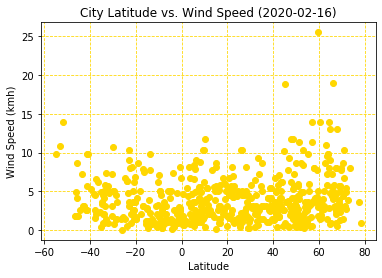

In [140]:
#line to form scatter plot
plt.scatter(city_data["Latitude"], city_data["Wind_Speed"], facecolors="gold")

#formatting
plt.title("City Latitude vs. Wind Speed (2020-02-16)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")
plt.grid(linestyle="--", color="gold")

#save plot as image
#plt.savefig("Latitude_vs_WindSpeed.png")